# Lab 6


In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Problem 1

### Part 1

In [13]:
columns = ["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',names = columns)
dataset

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [26]:
for i in columns:
  print(dataset[i].isnull().values.any())
dataset.info()

False
False
False
False
False
False
False
False
False
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


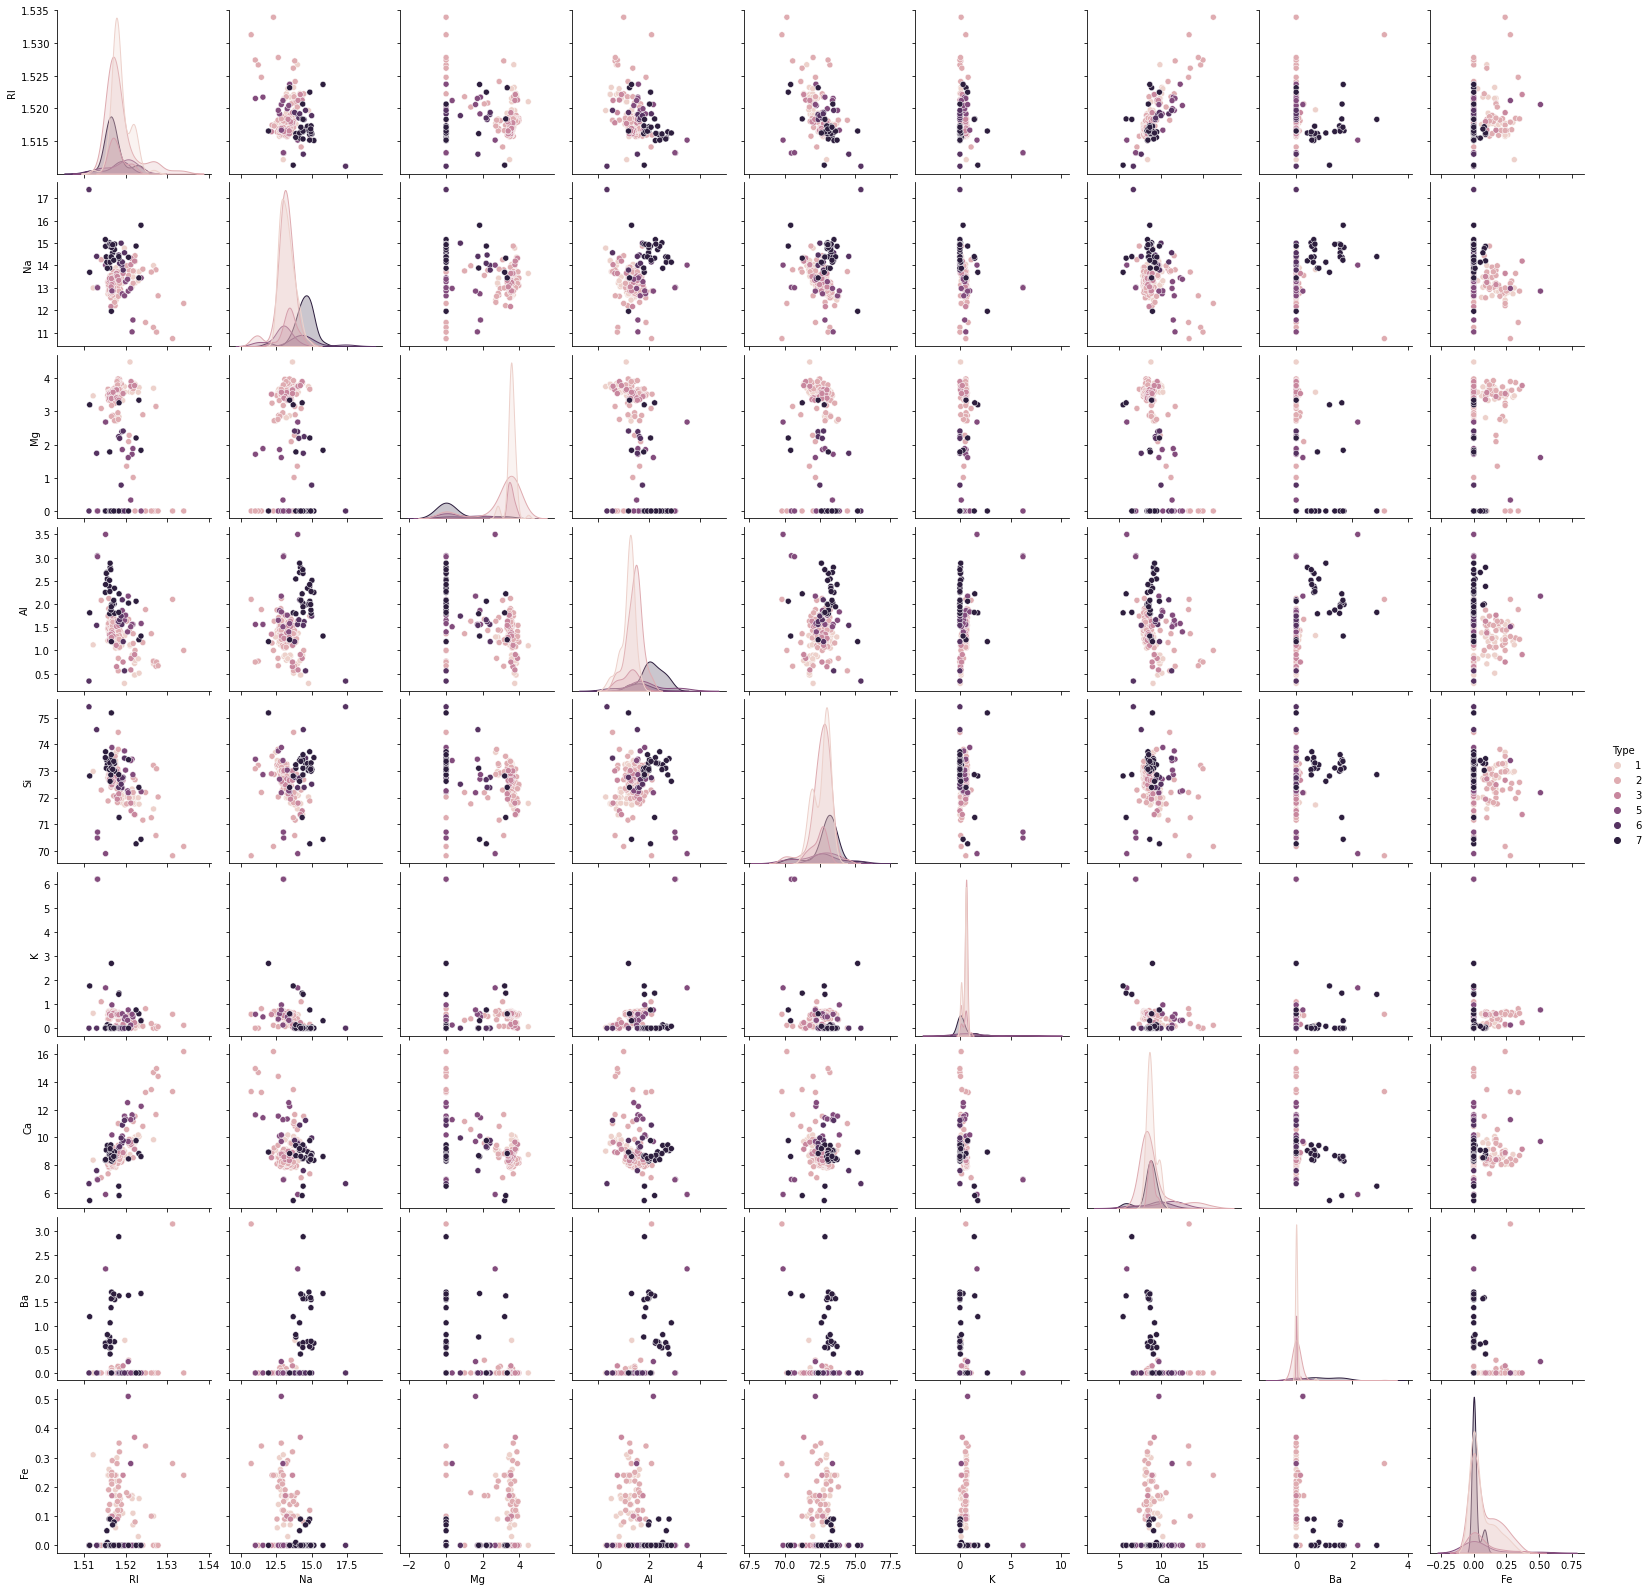

In [27]:
sns.pairplot(data = dataset.drop("ID",axis = 1),hue = "Type")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


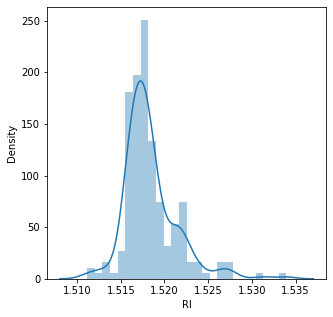

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


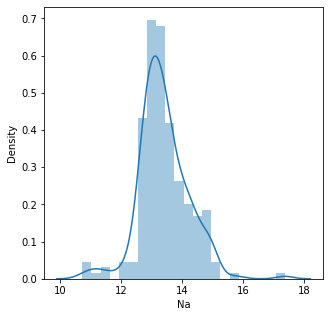

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


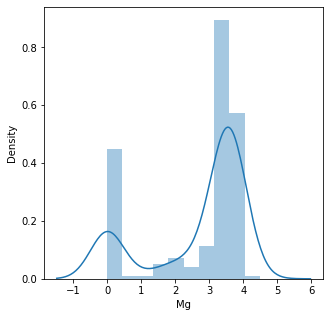

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


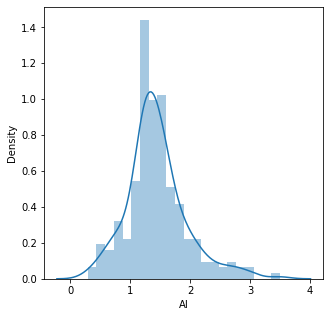

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


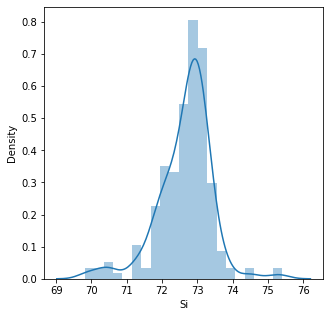

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


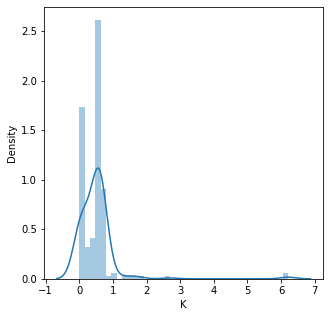

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


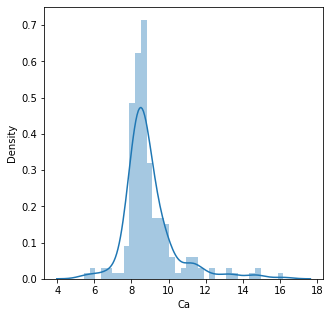

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


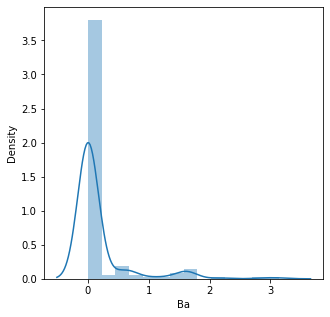

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


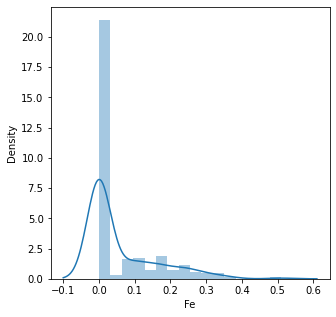

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


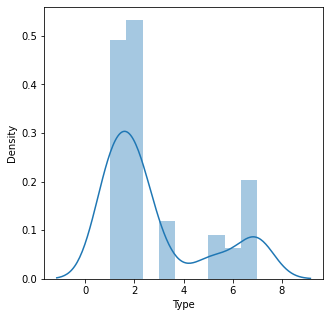

In [29]:
plt.rcParams["figure.figsize"] = (5,5)
for i in columns:
  if(i=="ID"):
    continue
  else:
    sns.distplot(dataset[i])
    plt.show()

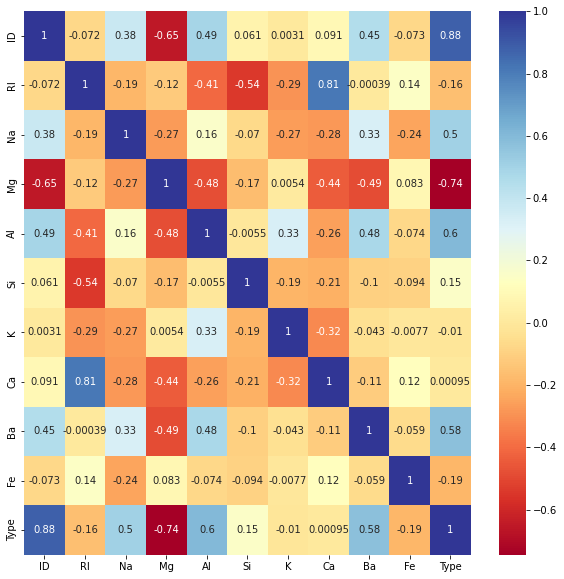

In [24]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(dataset.corr(),cmap = "RdYlBu",annot = True)
plt.show()

In [30]:
dataset2 = dataset.drop(["ID","Type"],axis = 1)

### Part a)


In [32]:
X = dataset2.copy()
Y = dataset["Type"]
model = KMeans(n_clusters = 7)
labels = model.fit_predict(X)
labels

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 0, 5,
       0, 5, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 1, 1,
       6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 1, 1, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 5, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       5, 5, 5, 5, 4, 4, 1, 1, 4, 3, 3, 0, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4], dtype=int32)

In [37]:
label_0 = X[labels == 0]
label_1 = X[labels == 1]
label_2 = X[labels == 2]
label_3 = X[labels == 3]
label_4 = X[labels == 4]
label_5 = X[labels == 5]
label_6 = X[labels == 6]
label_i = []
label_i.append(label_0)
label_i.append(label_1)
label_i.append(label_2)
label_i.append(label_3)
label_i.append(label_4)
label_i.append(label_5)
label_i.append(label_6)

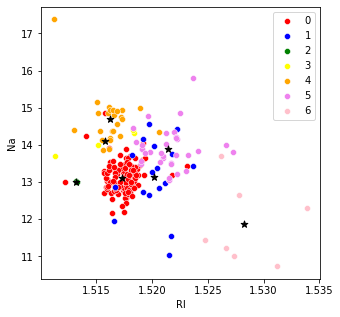

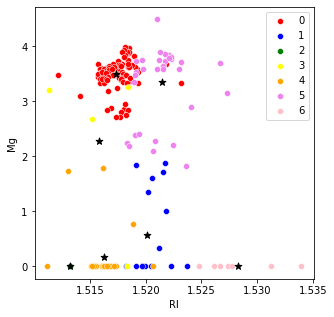

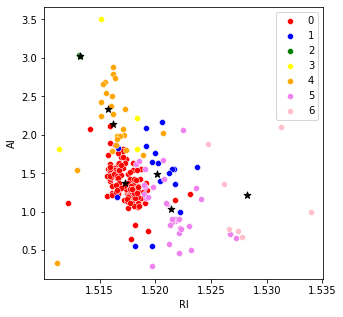

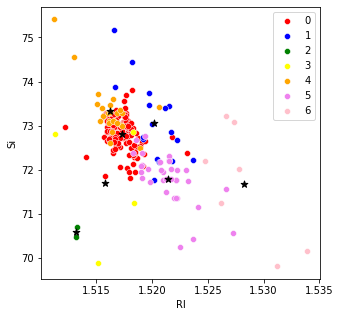

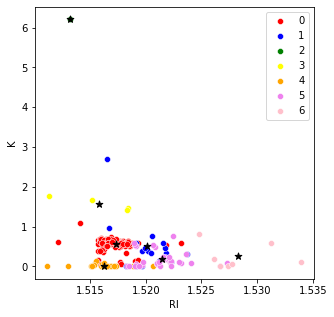

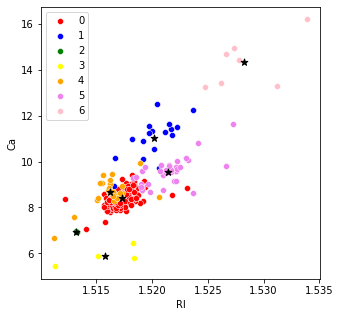

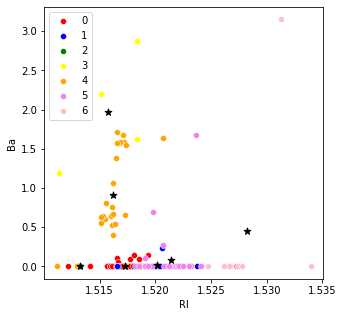

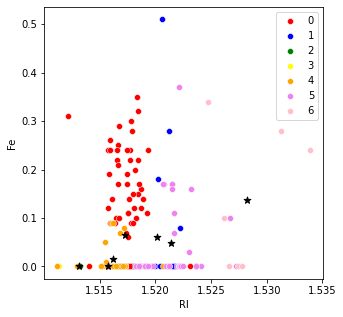

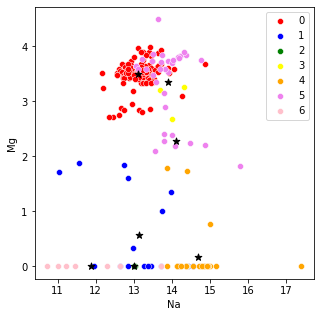

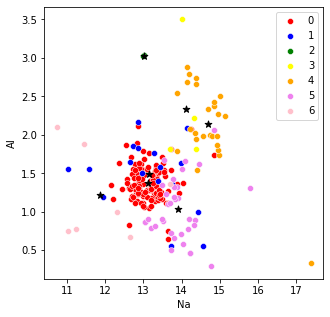

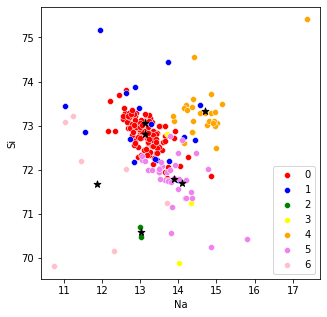

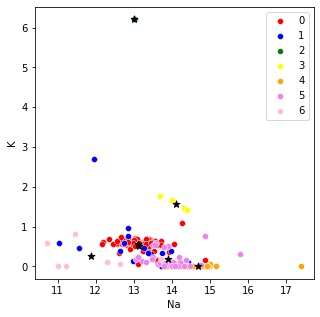

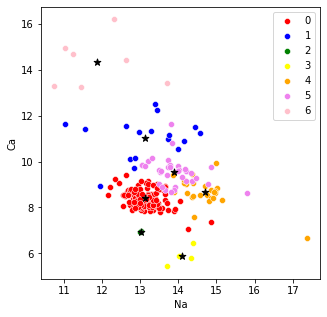

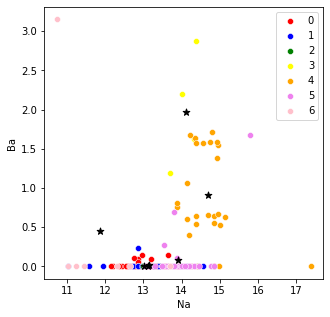

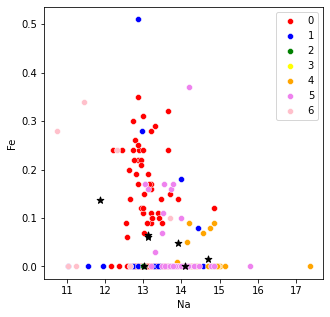

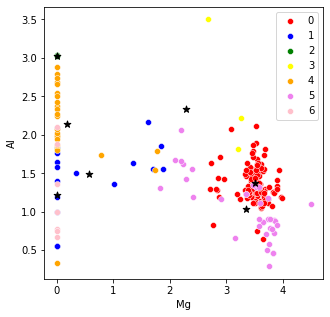

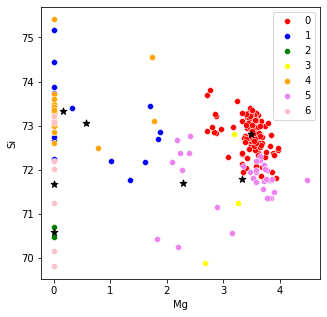

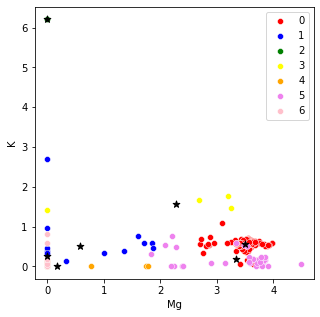

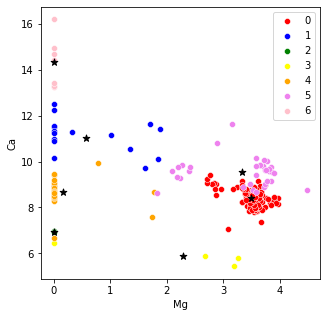

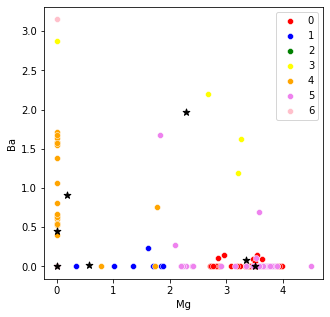

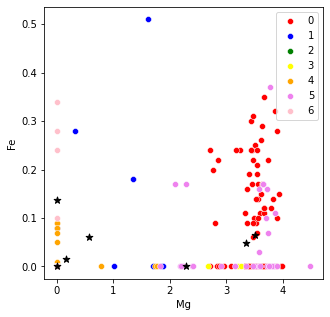

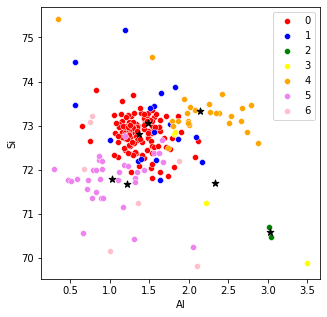

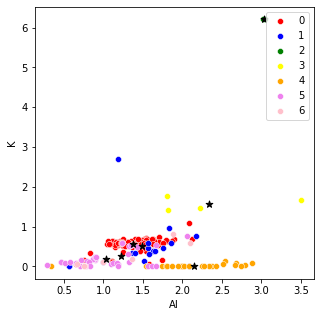

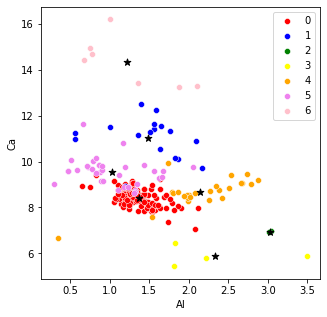

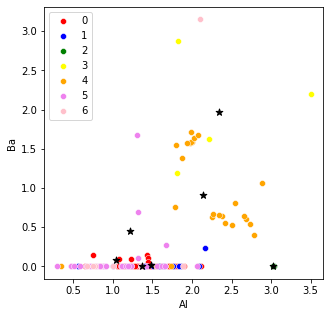

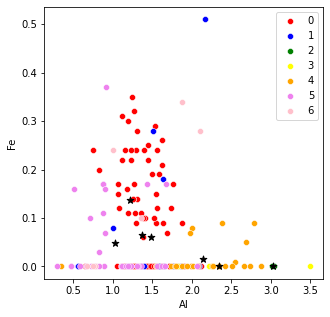

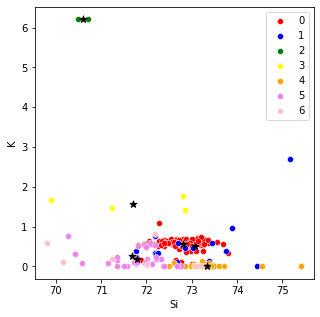

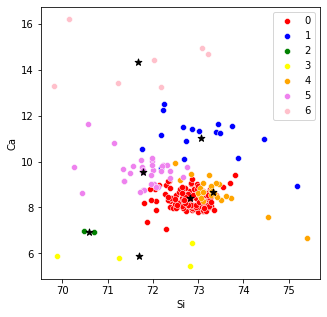

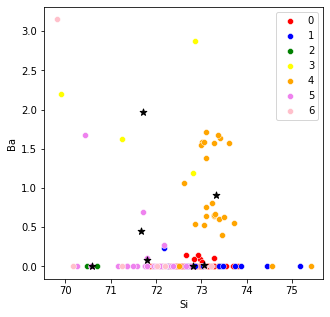

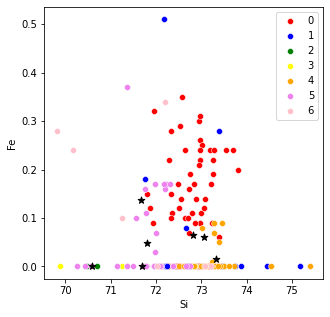

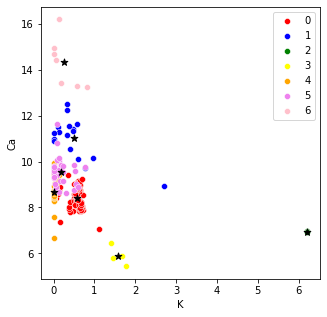

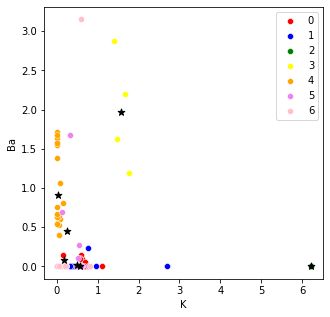

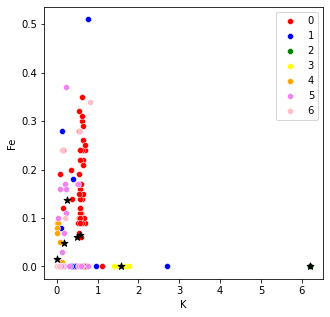

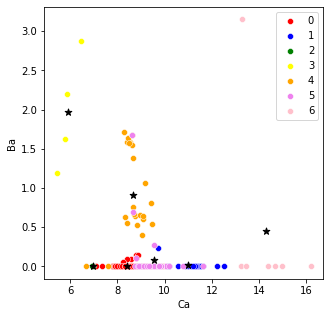

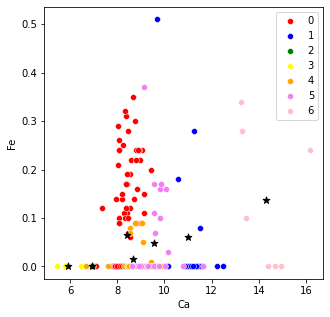

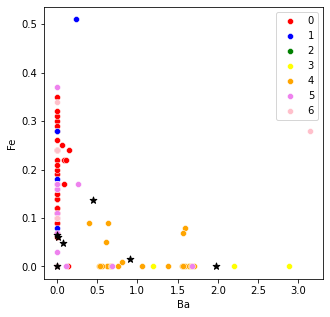

36


In [77]:
cols = X.columns
colors = ['red','blue','green','yellow','orange','violet','pink']
cnt = 0
centroids = model.cluster_centers_
# print(centroids)
for j in range(len(X.columns)):
  for k in range(j,len(X.columns)):
    if(j == k):
      continue
    else:
      for i in range(0,7):
        sns.scatterplot(x = label_i[i][cols[j]], y = label_i[i][cols[k]], color = colors[i],label = i)
      plt.scatter(centroids[:,j],centroids[:,k], marker = "*",s = 50,color = 'black')
      plt.xlabel(cols[j])
      plt.ylabel(cols[k])
      plt.legend()
    plt.show()
    cnt += 1
print(cnt)

### Part b)

Silhouette Score(n = 2): 0.5600270361711069


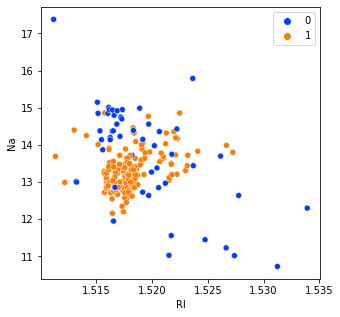

Silhouette Score(n = 3): 0.5822429516169841


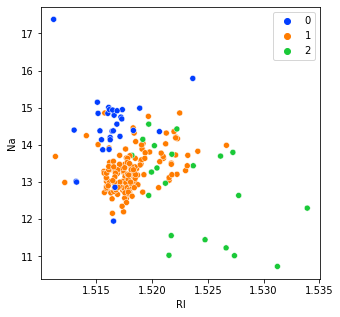

Silhouette Score(n = 4): 0.5890367504178874


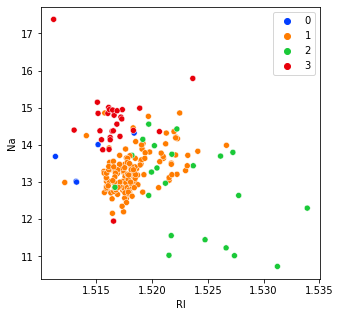

Silhouette Score(n = 5): 0.4451765429855775


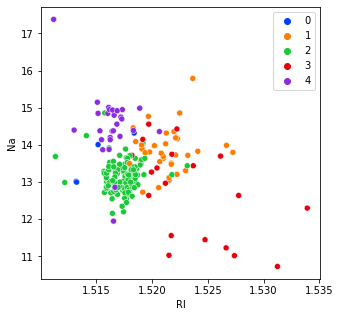

Silhouette Score(n = 6): 0.44829061892735494


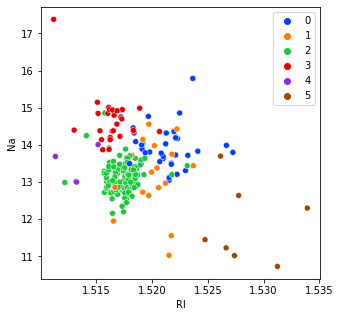

Silhouette Score(n = 7): 0.46261956793341563


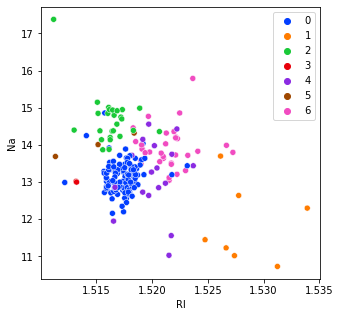

Silhouette Score(n = 8): 0.46189892940585686


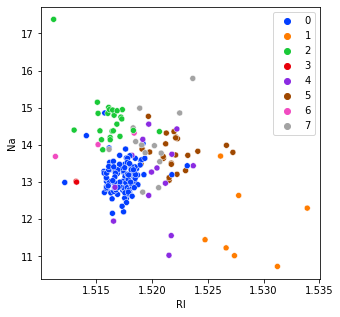

Silhouette Score(n = 9): 0.3041441405002678


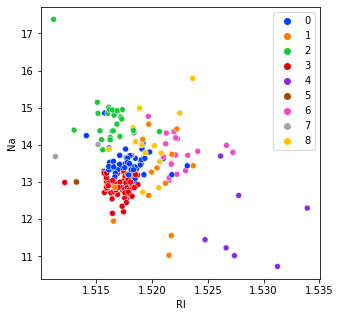

9


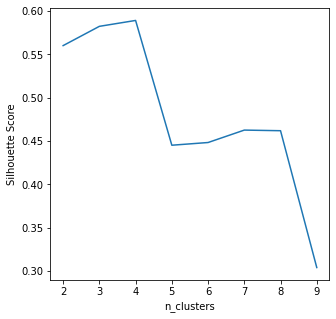

In [86]:
score_arr = []
arr=[]
for i in range(2,10):
  KMean= KMeans(n_clusters=i)
  label=KMean.fit_predict(X)
  print("Silhouette Score(n = "+str(i)+"):", silhouette_score(X.to_numpy(), label))
  sns.scatterplot(x = X[cols[0]], y =X[cols[1]],hue=label,palette='bright')
  score_arr.append(silhouette_score(X, label))
  arr.append(i)
  plt.show()
plt.plot(arr,score_arr)
plt.ylabel("Silhouette Score")
plt.xlabel("n_clusters")
print(2 + score_arr.index(min(score_arr)))

We can say that for n_clusters if Silhouette score is minimum for that n_cluster value then it is the optimal value of k.